In [1]:
import pandas as pd
import numpy as np


import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

## Dataset

In [2]:
#!wget 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv' -O '../datasets/house.csv'

## Features

In [3]:
house_df = pd.read_csv('../datasets/house.csv')
house_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
house_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

## Data Preparation

-    Select only the features from above and fill in the missing values with 0.

-    Create a new column rooms_per_household by dividing the column total_rooms by the column households from dataframe.

-    Create a new column bedrooms_per_room by dividing the column total_bedrooms by the column total_rooms from dataframe.

-    Create a new column population_per_household by dividing the column population by the column households from dataframe.


In [5]:
house_df = house_df[[
    'latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value',
    'ocean_proximity',
]]

In [6]:
house_df.isna().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
house_df['total_bedrooms'] = house_df['total_bedrooms'].fillna(0)
house_df.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [8]:
house_df['rooms_per_household'] = house_df['total_rooms']/house_df['households']
house_df['rooms_per_household'].head()

0    6.984127
1    6.238137
2    8.288136
3    5.817352
4    6.281853
Name: rooms_per_household, dtype: float64

In [9]:
house_df['bedrooms_per_room'] = house_df['total_bedrooms']/house_df['total_rooms']
house_df['bedrooms_per_room'].head()

0    0.146591
1    0.155797
2    0.129516
3    0.184458
4    0.172096
Name: bedrooms_per_room, dtype: float64

In [10]:
house_df['population_per_household'] = house_df['population']/house_df['households']
house_df['population_per_household'].head()

0    2.555556
1    2.109842
2    2.802260
3    2.547945
4    2.181467
Name: population_per_household, dtype: float64

## Question 1

What is the most frequent observation (mode) for the column ocean_proximity?

Options:

-    NEAR BAY

-    <1H OCEAN

-    INLAND

-    NEAR OCEAN


In [11]:
house_df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

## Split the data

-    Split your data in train/val/test sets, with 60%/20%/20% distribution.

-    Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.

-    Make sure that the target value (median_house_value) is not in your dataframe.


In [12]:
train_full_df, test_df = train_test_split(house_df, test_size=0.2, random_state=42)

In [13]:
train_df, val_df = train_test_split(train_full_df, test_size=(0.2/0.8), random_state=42)

In [14]:
len(train_df), len(val_df), len(test_df)

(12384, 4128, 4128)

In [15]:
x_train = train_df.drop('median_house_value', axis=1)
x_val = val_df.drop('median_house_value', axis=1)
x_test = test_df.drop('median_house_value', axis=1)

y_train = train_df['median_house_value']
y_val = val_df['median_house_value']
y_test = test_df['median_house_value']

In [16]:
x_train.reset_index(drop=True, inplace=True)
x_val.reset_index(drop=True, inplace=True)
x_test.reset_index(drop=True, inplace=True)

y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [17]:
'median_house_value' in x_train.columns, 'median_house_value' in x_val.columns, 'median_house_value' in x_test.columns

(False, False, False)

## Question 2

Create the correlation matrix for the numerical features of your train dataset.

In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

Options:

-    total_bedrooms and households

-    total_bedrooms and total_rooms

-    population and households

-    population_per_household and total_rooms


In [18]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12384 entries, 0 to 12383
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   latitude                  12384 non-null  float64
 1   longitude                 12384 non-null  float64
 2   housing_median_age        12384 non-null  float64
 3   total_rooms               12384 non-null  float64
 4   total_bedrooms            12384 non-null  float64
 5   population                12384 non-null  float64
 6   households                12384 non-null  float64
 7   median_income             12384 non-null  float64
 8   ocean_proximity           12384 non-null  object 
 9   rooms_per_household       12384 non-null  float64
 10  bedrooms_per_room         12384 non-null  float64
 11  population_per_household  12384 non-null  float64
dtypes: float64(11), object(1)
memory usage: 1.1+ MB


In [19]:
numerical = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income', 
        'rooms_per_household','bedrooms_per_room', 'population_per_household']

In [20]:
correlation_matrix = x_train[numerical].corr()
correlation_matrix

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.925005,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
longitude,-0.925005,1.000000,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
housing_median_age,0.002477,-0.099812,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,-0.025914,0.036449,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,-0.059730,0.063840,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,-0.100272,0.091670,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,-0.063529,0.049762,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.076805,-0.016426,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,0.119118,-0.034814,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,-0.124507,0.102320,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


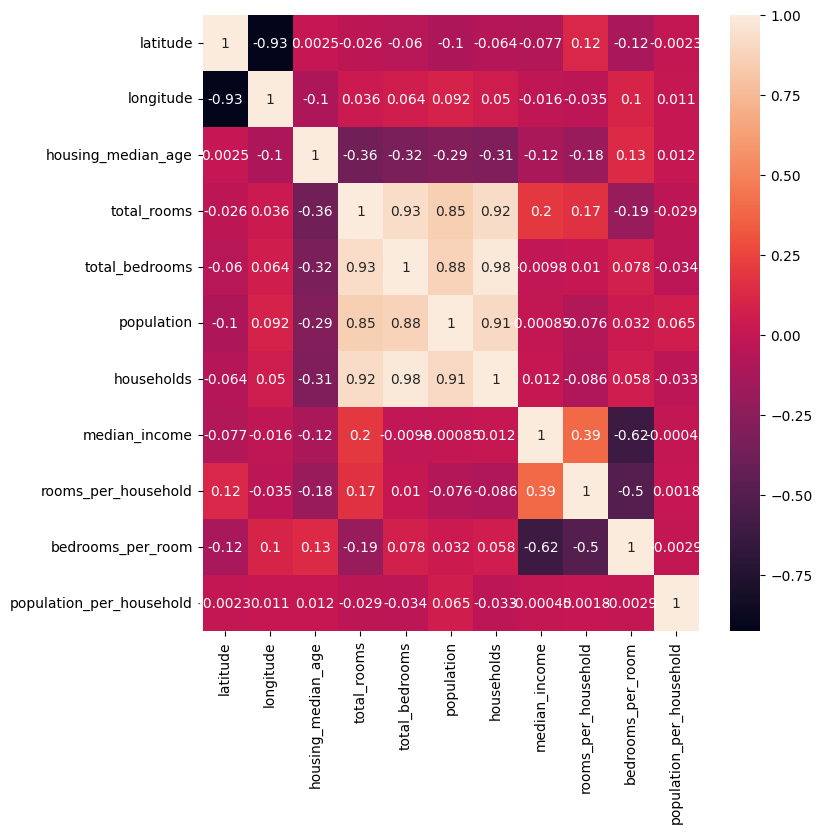

In [21]:
fig, ax = plt.subplots(figsize=(8,8))
sn.heatmap(correlation_matrix, annot=True, ax=ax)
plt.show()

Make median_house_value binary

-    We need to turn the median_house_value variable from numeric into binary.

-    Let's create a variable above_average which is 1 if the median_house_value is above its mean value and 0 otherwise.


In [22]:
def binarize(serie):
    mean_value = serie.mean()
    return serie.apply(lambda x: 1 if x>mean_value else 0).astype(int)

In [23]:
y_train_binary = binarize(y_train)
y_val_binary = binarize(y_val)
y_test_binary = binarize(y_test)

pd.concat([y_train_binary, y_val_binary, y_test_binary], axis=1).head()

,median_house_value,median_house_value,median_house_value
0,1,0.0,0.0
1,1,0.0,0.0
2,0,1.0,1.0
3,1,1.0,1.0
4,1,1.0,1.0


## Question 3

Calculate the mutual information score with the (binarized) price for the categorical variable that we have. Use the training set only.

What is the value of mutual information?

Round it to 2 decimal digits using round(score, 2)

Options:

-    0.26

-    0

-    0.10

-    0.16


In [24]:
categorical = ['ocean_proximity']

In [25]:
x_train[categorical].apply(lambda x: round(mutual_info_score(x, y_train_binary),2))

ocean_proximity    0.1
dtype: float64

## Question 4

Now let's train a logistic regression

Remember that we have one categorical variable ocean_proximity in the data. Include it using one-hot encoding.

Fit the model on the training dataset.

To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)

Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

Options:

-    0.60

-    0.72

-    0.84

-    0.95


In [26]:
x_train_dict = x_train[categorical + numerical].to_dict(orient='records')

In [27]:
dv = DictVectorizer(sparse=False)

In [28]:
X_train = dv.fit_transform(x_train_dict)

In [29]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [30]:
x_val_dict = x_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(x_val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
y_pred

array([3.82758355e-06, 2.58201751e-07, 1.07954349e-16, ...,
       2.51916620e-12, 2.89325845e-12, 7.50550569e-07])

In [31]:
above_mean_value = y_pred>0.5

In [32]:
global_accuracy = round((y_val_binary == above_mean_value).mean(),2)
global_accuracy

0.6

## Question 5

Let's find the least useful feature using the feature elimination technique.

Train a model with all these features (using the same parameters as in Q4).

Now exclude each feature from this set and train a model without it. Record the accuracy for each model.

For each feature, calculate the difference between the original accuracy and the accuracy without the feature.

Which of following feature has the smallest difference?

 -       total_rooms
 
 -      total_bedrooms
 
 -      population
 
 -      households

    note: the difference doesn't have to be positive


In [33]:
dv = DictVectorizer(sparse=False)
def train_model(x_df,features,y_df):
    x_train_dict = x_df[features].to_dict(orient='records')
    X_train = dv.fit_transform(x_train_dict)
    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    return model.fit(X_train, y_df)

In [34]:
def predict(x_val, feature, model):
    x_val_dict = x_val[feature].to_dict(orient='records')
    X_val = dv.transform(x_val_dict)

    return model.predict_proba(X_val)[:, 1]

In [35]:
feature_list = [
    'latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household'
]

In [36]:
for feature in feature_list:
    feat = list(filter(lambda x: x!=feature, feature_list))
    model = train_model(x_train, feat, y_train_binary)
    pred = predict(x_val, feat, model)
    above_mean_value = pred>0.5
    accuracy = round((y_val_binary == above_mean_value).mean(),2)
    print(f'Feature: {feature}, Accuracy: {accuracy}, Diferença: {round(global_accuracy - accuracy,2)}')

Feature: latitude, Accuracy: 0.83, Diferença: -0.23
Feature: longitude, Accuracy: 0.83, Diferença: -0.23
Feature: housing_median_age, Accuracy: 0.83, Diferença: -0.23
Feature: total_rooms, Accuracy: 0.84, Diferença: -0.24
Feature: total_bedrooms, Accuracy: 0.84, Diferença: -0.24
Feature: population, Accuracy: 0.83, Diferença: -0.23
Feature: households, Accuracy: 0.83, Diferença: -0.23
Feature: median_income, Accuracy: 0.79, Diferença: -0.19
Feature: ocean_proximity, Accuracy: 0.82, Diferença: -0.22
Feature: rooms_per_household, Accuracy: 0.84, Diferença: -0.24
Feature: bedrooms_per_room, Accuracy: 0.84, Diferença: -0.24
Feature: population_per_household, Accuracy: 0.84, Diferença: -0.24


In [ ]:
x_train_dict = x_train[['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(x_train_dict)
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

x_val_dict = x_val[['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 
       'ocean_proximity', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household']].to_dict(orient='records')
X_val = dv.transform(x_val_dict)

y_pred = model.predict_proba(X_val)[:, 1]

above_mean_value = y_pred>0.5
accuracy = round((y_val_binary == above_mean_value).mean(),2)

## Question 6

For this question, we'll see how to use a linear regression model from Scikit-Learn

We'll need to use the original column 'median_house_value'. Apply the logarithmic transformation to this column.

Fit the Ridge regression model (model = Ridge(alpha=a, solver="sag", random_state=42)) on the training data.

This model has a parameter alpha. Let's try the following values: [0, 0.01, 0.1, 1, 10]

Which of these alphas leads to the best RMSE on the validation set? Round your RMSE scores to 3 decimal digits.

If there are multiple options, select the smallest alpha.

Options:

-    0

-    0.01

-    0.1

-    1

-    10
